# Generate H5AD Input

In [1]:
# Import Packages

%load_ext autoreload
%autoreload 2

import os
# import warnings 
# warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from anndata import AnnData

# Customized packages
import starmap.sc_util as su

## Input

In [2]:
# Set path
ppath = 'Z:/Data/Processed/2022-09-12-Rena-HeLa16Gene/output'
areas = range(1,8)

In [4]:
# Load whole cell data
structure = 'whole_cell'
expr_path = os.path.join(ppath, structure, 'complete_cell_barcode_count.csv')
var_path = os.path.join(ppath, structure, 'cell_barcode_names.csv')
obs_path = os.path.join(ppath, structure, 'complete_meta.csv')

expr_x = np.loadtxt(expr_path, delimiter=',')
var = pd.read_csv(var_path, header=None)
var = pd.DataFrame(index=var.iloc[:,2].to_list())
obs = pd.read_csv(obs_path, index_col=0)

In [5]:
# create AnnData object
adata = AnnData(X=expr_x.astype('int'), var=var, obs=obs)
adata

C:\Users\wangk\AppData\Local\Temp\ipykernel_42736\4287201849.py:2: FutureWarning: X.dtype being converted to np.float32 from int32. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(X=expr_x.astype('int'), var=var, obs=obs)
c:\Users\wangk\.conda\envs\connie\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 3676 × 16
    obs: 'orig_index', 'sample', 'area', 'x', 'y', 'z'

In [6]:
# Load nucleus data
structure = 'nucleus'
expr_path = os.path.join(ppath, structure, 'complete_cell_barcode_count.csv')
var_path = os.path.join(ppath, structure, 'cell_barcode_names.csv')
obs_path = os.path.join(ppath, structure, 'complete_meta.csv')

# Add expression data to the AnnData object 
expr_x = np.loadtxt(expr_path, delimiter=',')
var = pd.read_csv(var_path, header=None)
var = pd.DataFrame(index=var.iloc[:,2].to_list())
obs = pd.read_csv(obs_path, index_col=0)

nucdata = AnnData(X=expr_x, var=var, obs=obs)

C:\Users\wangk\AppData\Local\Temp\ipykernel_42736\1019487768.py:13: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  nucdata = AnnData(X=expr_x, var=var, obs=obs)
c:\Users\wangk\.conda\envs\connie\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [7]:
adata.layers['nucleus'] = expr_x
adata

AnnData object with n_obs × n_vars = 3676 × 16
    obs: 'orig_index', 'sample', 'area', 'x', 'y', 'z'
    layers: 'nucleus'

## QC

c:\Users\wangk\.conda\envs\connie\lib\site-packages\scanpy\preprocessing\_normalization.py:182: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


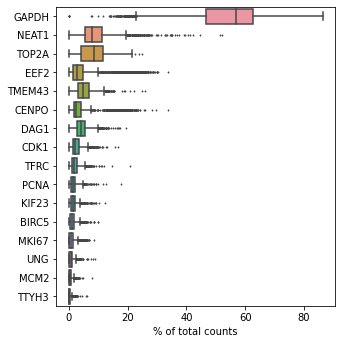

In [8]:
# Plot top 20 most expressed genes 
sc.pl.highest_expr_genes(adata, n_top=20)

## Regular Filtration

In [9]:
# Calculate QC metrics
sc.pp.calculate_qc_metrics(adata, percent_top=None, inplace=True)
# Calculate max count for each gene
adata.var['max_counts'] = adata.X.max(axis=0)

In [10]:
adata.obs

,orig_index,sample,area,x,y,z,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts
0,0,1,930252,99,4953,24,15,2.772589,463.0,6.139884
1,1,1,703315,90,7027,23,15,2.772589,311.0,5.743003
2,2,1,940040,129,2815,21,14,2.708050,346.0,5.849325
3,3,1,1656235,190,3781,23,15,2.772589,693.0,6.542472
4,4,1,700564,176,1398,25,15,2.772589,275.0,5.620401
...,...,...,...,...,...,...,...,...,...,...
3671,507,7,827794,12997,2501,16,16,2.833213,501.0,6.218600
3672,508,7,731055,13051,6528,16,16,2.833213,795.0,6.679599
3673,509,7,759538,13031,7709,16,15,2.772589,655.0,6.486161
3674,510,7,753529,13038,5499,16,14,2.708050,465.0,6.144186


In [11]:
adata.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,max_counts
EEF2,3512,39.887379,3.710821,4.461371,146626.0,11.895647,584.0
TFRC,3478,10.232046,2.418771,5.386289,37613.0,10.535131,94.0
NEAT1,3646,34.338409,3.564970,0.816104,126228.0,11.745853,381.0
TOP2A,3659,27.481773,3.349264,0.462459,101023.0,11.523113,130.0
DAG1,3613,20.064199,3.047575,1.713819,73756.0,11.208531,273.0
MKI67,2776,6.890370,2.065643,24.483134,25329.0,10.139745,169.0
TMEM43,3629,24.080795,3.222102,1.278564,88521.0,11.391006,226.0
TTYH3,2041,1.341132,0.850634,44.477693,4930.0,8.503297,17.0
BIRC5,3037,6.263602,1.982876,17.383025,23025.0,10.044379,72.0
PCNA,3234,8.430087,2.243905,12.023939,30989.0,10.341420,80.0


In [12]:
def plot_stats_per_cell(adata, color='sample', save=False):
    plt.figure(figsize=(15, 5))

    reads_per_cell = adata.obs['total_counts']
    genes_per_cell = adata.obs['n_genes_by_counts']

    plt.subplot(1, 3, 1)
    sns.histplot(reads_per_cell)
    plt.ylabel('# cells')
    plt.xlabel('# reads')

    plt.subplot(1, 3, 2)
    sns.histplot(genes_per_cell)
    plt.ylabel('# cells')
    plt.xlabel('# genes')

    plt.subplot(1, 3, 3)
    plt.title(
        'R=%f' % np.corrcoef(reads_per_cell.T, genes_per_cell)[0, 1])  # Pearson product-moment correlation coefficients
    sns.scatterplot(data=adata.obs, x='total_counts', y='n_genes_by_counts', hue=color, s=5)
    plt.xlabel("Reads per cell")
    plt.ylabel("Genes per cell")
    plt.legend(loc='lower right')
    plt.tight_layout()

    if save:
        # current_fig_path = os.path.join(os.getcwd(), "output/figures/cell_stats.pdf")
        current_fig_path = "./figures/cell_stats.pdf"
        plt.savefig(current_fig_path)
    plt.show()

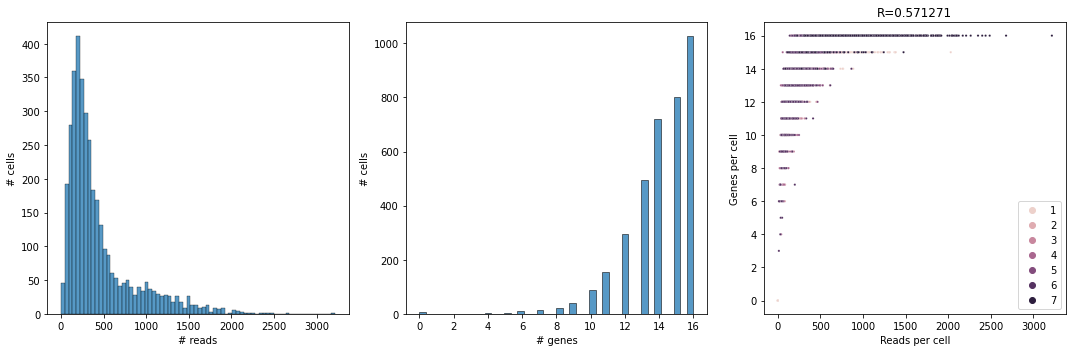

In [13]:
# Per-cell Stats Plot
plot_stats_per_cell(adata, save=False)

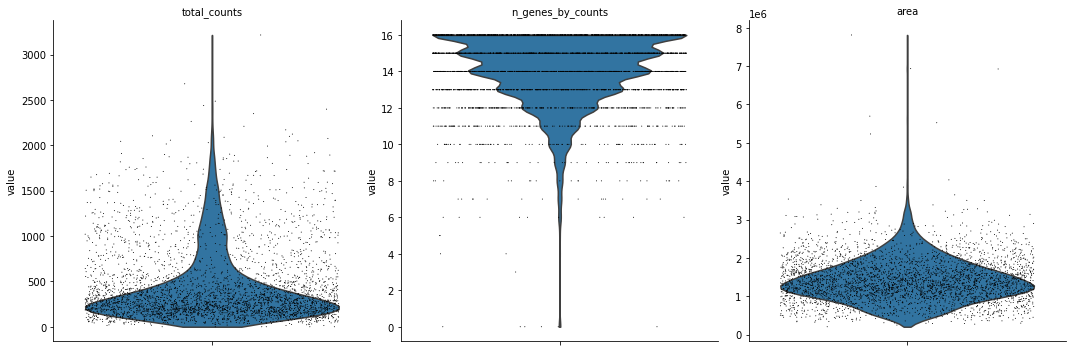

In [14]:
sc.pl.violin(adata, ['total_counts', 'n_genes_by_counts', 'area'],
             jitter=0.4, multi_panel=True)

In [15]:
# Get quantiles of reads
su.show_reads_quantile(adata)

Reads per cell quantile:
0.10     112.0
0.25     184.0
0.50     296.0
0.75     530.0
0.90    1043.5
Name: total_counts, dtype: float64


## Output

In [16]:
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')
adata.write_h5ad(os.path.join(ppath, '2022-10-11-Rena-HeLa16Gene-preflt.h5ad'))

In [18]:
# test
adata = sc.read_h5ad('Z:/Data/Processed/2022-09-12-Rena-HeLa16Gene/output/2022-10-11-Rena-HeLa16Gene-preflt.h5ad')

In [19]:
adata

AnnData object with n_obs × n_vars = 3676 × 16
    obs: 'orig_index', 'sample', 'area', 'x', 'y', 'z', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'max_counts'
    layers: 'nucleus'

In [20]:
adata.X

array([[ 33.,   7.,  23., ...,   9.,   9., 235.],
       [ 22.,   6.,  30., ...,  12.,   3., 149.],
       [ 16.,  20.,  26., ...,  23.,   8., 150.],
       ...,
       [108.,  30.,  52., ..., 115.,  14., 153.],
       [ 68.,  22.,  14., ...,  69.,  16., 130.],
       [ 55.,   9.,  22., ...,  73.,   9., 101.]], dtype=float32)

In [21]:
adata.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,max_counts
EEF2,3512,39.887379,3.710821,4.461371,146626.0,11.895647,584.0
TFRC,3478,10.232046,2.418771,5.386289,37613.0,10.535131,94.0
NEAT1,3646,34.338409,3.564970,0.816104,126228.0,11.745853,381.0
TOP2A,3659,27.481773,3.349264,0.462459,101023.0,11.523113,130.0
DAG1,3613,20.064199,3.047575,1.713819,73756.0,11.208531,273.0
MKI67,2776,6.890370,2.065643,24.483134,25329.0,10.139745,169.0
TMEM43,3629,24.080795,3.222102,1.278564,88521.0,11.391006,226.0
TTYH3,2041,1.341132,0.850634,44.477693,4930.0,8.503297,17.0
BIRC5,3037,6.263602,1.982876,17.383025,23025.0,10.044379,72.0
PCNA,3234,8.430087,2.243905,12.023939,30989.0,10.341420,80.0


In [22]:
adata.obs

,orig_index,sample,area,x,y,z,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts
0,0,1,930252,99,4953,24,15,2.772589,463.0,6.139884
1,1,1,703315,90,7027,23,15,2.772589,311.0,5.743003
2,2,1,940040,129,2815,21,14,2.708050,346.0,5.849325
3,3,1,1656235,190,3781,23,15,2.772589,693.0,6.542472
4,4,1,700564,176,1398,25,15,2.772589,275.0,5.620401
...,...,...,...,...,...,...,...,...,...,...
3671,507,7,827794,12997,2501,16,16,2.833213,501.0,6.218600
3672,508,7,731055,13051,6528,16,16,2.833213,795.0,6.679599
3673,509,7,759538,13031,7709,16,15,2.772589,655.0,6.486161
3674,510,7,753529,13038,5499,16,14,2.708050,465.0,6.144186


In [23]:
adata.layers['nucleus']

array([[ 6.,  5., 21., ...,  5.,  7., 17.],
       [ 5.,  4., 25., ..., 11.,  3., 29.],
       [ 4.,  9., 19., ..., 15.,  3., 16.],
       ...,
       [ 7.,  4., 45., ..., 58.,  7.,  9.],
       [ 3.,  7., 11., ..., 40., 12., 14.],
       [ 2.,  2., 20., ..., 23.,  6.,  1.]])